In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load and view data

In [69]:
# Load data

data1 = pd.read_csv('Short broad experiment(run 1).csv')
data2 = pd.read_csv('Short broad experiment(run 2).csv')
data3 = pd.read_csv('Short broad experiment(run 3).csv')
all_runs_data = [data1, data2, data3]

In [70]:
data1.head()

,sample_size,use_num_mines_constraint,wins,num_games,time_elapsed,samples_considered,samples_with_solutions,difficulty
0,"(4, 4)",True,337,1000,331.847469,34221,7842,Beginner (9x9)
1,"(4, 4)",False,336,1000,288.720067,34219,7819,Beginner (9x9)
2,"(5, 5)",True,802,1000,242.443622,22435,8508,Beginner (9x9)
3,"(5, 5)",False,793,1000,203.104077,22468,8505,Beginner (9x9)
4,"(6, 6)",True,804,1000,221.211598,17596,6699,Beginner (9x9)


In [71]:
data2.head()

,wins,wins_without_guess,time_elapsed,samples_considered,samples_with_solutions,difficulty,sample_size,use_num_mines_constraint
0,786,419,492.099509,60809,11206,Beginner (9x9),4x4,True
1,574,160,1919.250641,208724,35744,Intermediate (16x16),4x4,True
2,146,21,3787.056724,390987,53538,Expert (16x30),4x4,True
3,762,402,334.871061,61062,11148,Beginner (9x9),4x4,False
4,569,148,1338.485999,209000,35698,Intermediate (16x16),4x4,False


In [72]:
data3.head()

,wins,wins_without_guess,time_elapsed,samples_considered,samples_with_solutions,difficulty,sample_size,use_num_mines_constraint,first_click_pos,first_click_is_zero,parameters_id
0,94,90,91.154057,4758,1342,Beginner (9x9),4x4,True,NaN,True,1
1,77,38,94.294395,5932,1061,Beginner (9x9),4x4,True,NaN,False,2
2,93,82,95.138067,5078,1348,Beginner (9x9),4x4,True,NaN,True,1
3,91,84,95.497410,5095,1372,Beginner (9x9),4x4,True,NaN,True,1
4,89,83,96.653554,5201,1330,Beginner (9x9),4x4,True,NaN,True,1


In [73]:
# Print columns as they are from the source

for (run_num, run_data) in enumerate(all_runs_data, 1):
    cols = run_data.columns
    print(f'Run {run_num} columns (n={len(cols)}):\n' + ', '.join(sorted(cols)), end='\n\n')

Run 1 columns (n=8):
difficulty, num_games, sample_size, samples_considered, samples_with_solutions, time_elapsed, use_num_mines_constraint, wins

Run 2 columns (n=8):
difficulty, sample_size, samples_considered, samples_with_solutions, time_elapsed, use_num_mines_constraint, wins, wins_without_guess

Run 3 columns (n=11):
difficulty, first_click_is_zero, first_click_pos, parameters_id, sample_size, samples_considered, samples_with_solutions, time_elapsed, use_num_mines_constraint, wins, wins_without_guess



# Data cleaning

In [74]:
# Remove columns with the same value for all rows (i.e., column is not an experiment variable)
for (run_num, run_data) in enumerate(all_runs_data, 1):
    for x in run_data.columns:
        column_data = run_data[x]
        column_unique_values = column_data.unique()

        if len(column_unique_values) == 1:
            print(f"Run {run_num} column '{x}' has only one unique value: {column_unique_values[0]}. Removing...")
            all_runs_data[run_num - 1] = run_data.drop(x, axis=1)

Run 1 column 'num_games' has only one unique value: 1000. Removing...
Run 3 column 'first_click_pos' has only one unique value: nan. Removing...


# Analysis

In [75]:
# Show all labels after removing constant value columns

runs_labels = []

for (run_num, run_data) in enumerate(all_runs_data, 1):
    cols = run_data.columns
    runs_labels.append(set(cols))
    print(f'Run {run_num} columns (n={len(cols)}):\n' + ', '.join(sorted(cols)), end='\n\n')

Run 1 columns (n=7):
difficulty, sample_size, samples_considered, samples_with_solutions, time_elapsed, use_num_mines_constraint, wins

Run 2 columns (n=8):
difficulty, sample_size, samples_considered, samples_with_solutions, time_elapsed, use_num_mines_constraint, wins, wins_without_guess

Run 3 columns (n=10):
difficulty, first_click_is_zero, parameters_id, sample_size, samples_considered, samples_with_solutions, time_elapsed, use_num_mines_constraint, wins, wins_without_guess



In [78]:
# Show the extra columns that are included in later runs but not in the first run

print("Compared to the first run's columns,\n")

run_1_labels = runs_labels[0]

for (run_num, run_labels) in enumerate(runs_labels[1:], 2):
    extras = run_labels - run_1_labels
    print(f"Run {run_num} has {len(extras)} extra columns: " + ', '.join(sorted(extras)), end='\n')
    

Compared to the first run's columns,

Run 2 has 1 extra columns: wins_without_guess
Run 3 has 3 extra columns: first_click_is_zero, parameters_id, wins_without_guess


In [77]:
x = data1.samples_considered.sum()
y = data1.samples_with_solutions.sum()
(x, y, f"{round(y/x, 2) * 100}% samples had solutions")

(2148898, 696639, '32.0% samples had solutions')

In [14]:
total_estimate = x * 100
solved_estimate = y * 100
proportion_solved = solved_estimate / total_estimate
print("{:.2e} total samples, {:.2e} with solutions ({:.2f}%)".format(total_estimate, solved_estimate, proportion_solved * 100))

2.15e+08 total samples, 6.97e+07 with solutions (32.42%)


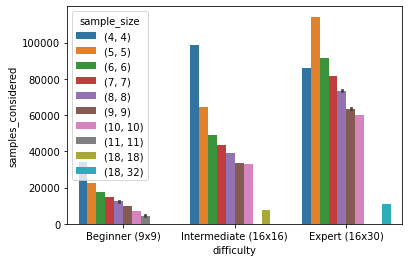

In [16]:
sns.barplot(x='difficulty', y='samples_considered', hue='sample_size', data=data1)
plt.show()

In [64]:
m = data['use_num_mines_constraint'] == True
df1, df2 = data[m], data[~m]
df1 = df1.drop(columns=['use_num_mines_constraint'])
df2 = df2.drop(columns=['use_num_mines_constraint'])

df1.difficulty = df1.difficulty.apply(lambda x: x + ' \nwith mine count')
df2.difficulty = df2.difficulty.apply(lambda x: x + ' \nwithout mine count')

modified_data = pd.concat([df1, df2])

modified_data.sample_size = modified_data.sample_size.apply(lambda x: 'x'.join(x.strip('()').split(', ')))
full_grid_sizes = ['11x11', '18x18', '18x32']
modified_data.sample_size = modified_data.sample_size.replace(full_grid_sizes, 'whole grid')
modified_data.sample_size

0            4x4
2            5x5
4            6x6
6            7x7
8            8x8
10           9x9
12         10x10
14    whole grid
16           4x4
18           5x5
20           6x6
22           7x7
24           8x8
26           9x9
28         10x10
30    whole grid
32           4x4
34           5x5
36           6x6
38           7x7
40           8x8
42           9x9
44         10x10
46    whole grid
1            4x4
3            5x5
5            6x6
7            7x7
9            8x8
11           9x9
13         10x10
15    whole grid
17           4x4
19           5x5
21           6x6
23           7x7
25           8x8
27           9x9
29         10x10
31    whole grid
33           4x4
35           5x5
37           6x6
39           7x7
41           8x8
43           9x9
45         10x10
47    whole grid
Name: sample_size, dtype: object

In [61]:
order =['Beginner (9x9) \nwith mine count',
        'Beginner (9x9) \nwithout mine count',
        'Intermediate (16x16) \nwith mine count',
        'Intermediate (16x16) \nwithout mine count',
        'Expert (16x30) \nwith mine count',
        'Expert (16x30) \nwithout mine count',]
order

['Beginner (9x9) \nwith mine count',
 'Beginner (9x9) \nwithout mine count',
 'Intermediate (16x16) \nwith mine count',
 'Intermediate (16x16) \nwithout mine count',
 'Expert (16x30) \nwith mine count',
 'Expert (16x30) \nwithout mine count']

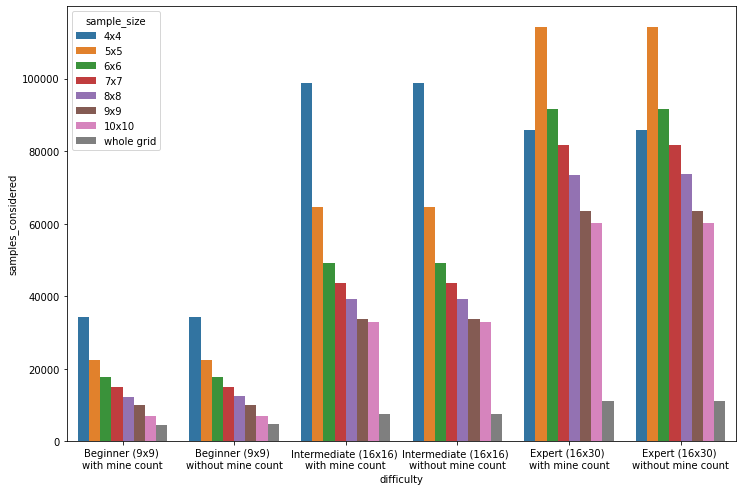

In [65]:
sns.barplot(x='difficulty',order=order, y='samples_considered', hue='sample_size', data=modified_data)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

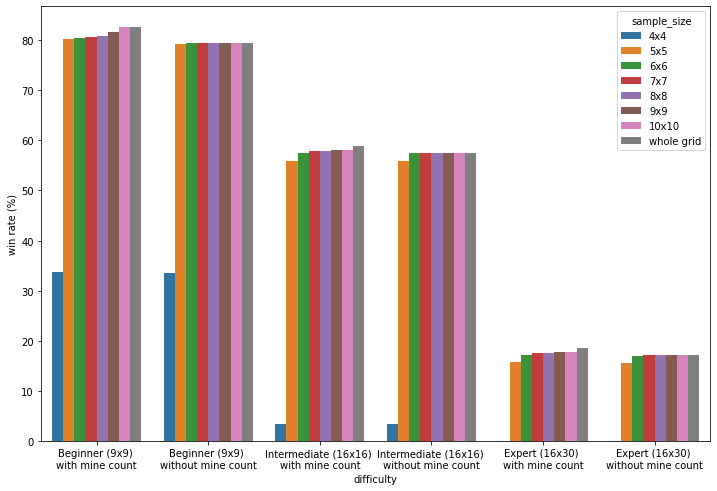

In [66]:
data2 = modified_data
data2['win rate (%)'] = (data2.wins / data2.num_games) * 100
sns.barplot(x='difficulty', order=order, y='win rate (%)', hue='sample_size', data=data2)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

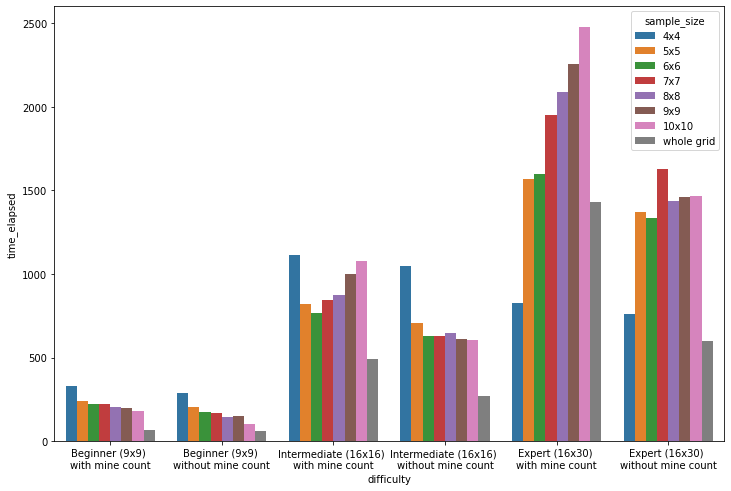

In [67]:
sns.barplot(x='difficulty', order=order, y='time_elapsed', hue='sample_size', data=data2)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

In [72]:
data2[data2.sample_size == "whole grid"]

,sample_size,wins,num_games,time_elapsed,samples_considered,samples_with_solutions,difficulty,win rate (%)
14,whole grid,826,1000,69.757486,4533,3275,Beginner (9x9) \nwith mine count,82.6
30,whole grid,589,1000,494.558674,7461,5276,Intermediate (16x16) \nwith mine count,58.9
46,whole grid,186,1000,1429.595657,11071,7594,Expert (16x30) \nwith mine count,18.6
15,whole grid,794,1000,59.170768,4622,3325,Beginner (9x9) \nwithout mine count,79.4
31,whole grid,575,1000,272.629904,7634,5363,Intermediate (16x16) \nwithout mine count,57.5
47,whole grid,172,1000,599.785770,11142,7612,Expert (16x30) \nwithout mine count,17.2
